INF8770 Technologies multimédias

Polytechnique Montréal

Exemple de calculs de caractéristiques acoustiques

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import find_peaks_cwt
from math import gcd
from detect_peaks import detect_peaks  #ne fait pas partie d'une librairie standard

Lecture d'un fichier audio et affichage 

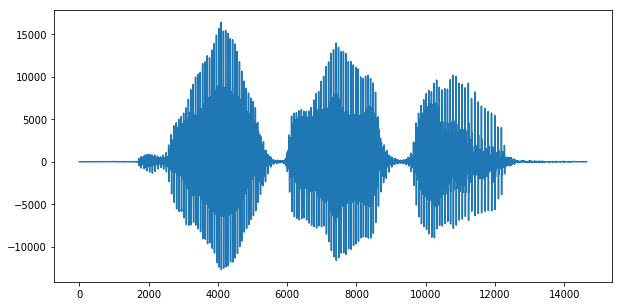

In [2]:
[fs, signal] = wavfile.read('000.wav')
fig1 = plt.figure(figsize = (10,5))
plt.plot(range(len(signal)), signal)
plt.show()

Première caractéristique: Intensité

In [3]:
Intensite = np.sqrt(np.sum(signal)**2);
print("Intensité = ",Intensite)

Intensité =  10061.0


Transformée de Fourier discrète du signal pour calculer les caractéristiques dans le domaine fréquentiel.

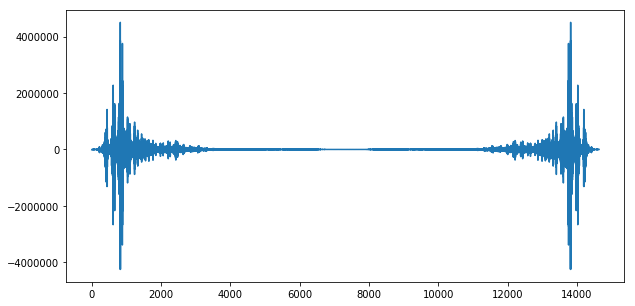

In [4]:
signalfreq = np.fft.fft(signal)
fig2 = plt.figure(figsize = (10,5))
plt.plot(range(len(signalfreq)), signalfreq.real)
plt.show()

Détection des fréquences les plus importantes du signal. Noter que pour la détection de pics, celle-ci dépend beaucoup des paramètres. 

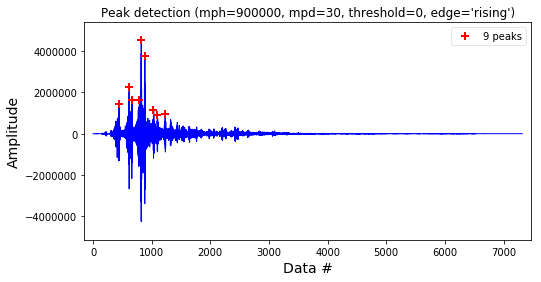

Pics : [ 441  617  659  791  822  884 1031 1098 1235]


In [5]:
peaks = detect_peaks(signalfreq[range(0,int(len(signalfreq)/2))].real, mph=900000, mpd=30, show=True)
print("Pics :", peaks)

Deuxième caractéristique: Hauteur tonale, le plus petit commun diviseur des pics.

In [6]:
hauteurtonale = peaks[1]
for i in range(1,len(peaks)):
    hauteurtonale = gcd(hauteurtonale,peaks[i])
    
print('Hauteur tonale= ', hauteurtonale)

Hauteur tonale=  1


Troisième caractéristique: Brillance, la moyenne des pics.

In [7]:
brillance = np.mean(peaks)
print('Brillance= ', brillance)

Brillance=  842.0


Quatrième caractéristique: Largeur de bande, la moyenne des pics auxquels on soustrait la brillance.

In [8]:
largeurdebande = np.mean(abs(peaks - brillance))
print('Largeur de bande= ', largeurdebande)

Largeur de bande=  195.55555555555554
